Group Members

Arlo Werner Roos            577441

Nkosinathi Owen Mabena      577732

Justin Gibbon               577407

Mphela Napo                 578379

Morne Bosch                 577323

Maropeng Sebati             578036

GitHub link:
https://github.com/JustinGibbon/Churn_Prediction


Problem Statement

In our modern day society evrything has turned to subscription based models. These subscriptions can be cancelled at anytime thus it is of utter importance for companies to be able to predict if a customer is likely to cancel their subscription or not. To solve this problem we will be creating and training a model to be able to predict how likely a customer is to cancel their subscription.

Data That will be used

The data used for this oroject is public and sourced by IBM. It is available at https://github.com/IBM/telco-customer-churn-on-icp4d. This data is from a fictional tele-communication company called Telco. This data gives us details about the customer and whether or not they have churned.We will thus be using it for our dataset.


We will first start of by importign our libraries.

In [36]:
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

telco_df = pd.read_csv("data/churn.csv")
telco_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can now see how our data looks.Lets see what data types we will be dealing with but as we can see it is not very complete.We will now create a function to give a summary of the dataset.

In [37]:
def DSummary(df, message):
    print(f'{message}:n')
    print('Total rows : ', df.shape[0])
    print("Total Features:", df.shape[1])
    print("Features:")
    print(df.columns.tolist())
    print(" Missing Values:", df.isnull().sum().values.sum())
    print(" Unique Values:")
    print(df.nunique())

DSummary(telco_df, 'Summary of Telco data')

Summary of Telco data:n
Total rows :  7043
Total Features: 21
Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
 Missing Values: 0
 Unique Values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


<Axes: title={'center': 'Churn Rate'}, ylabel='count'>

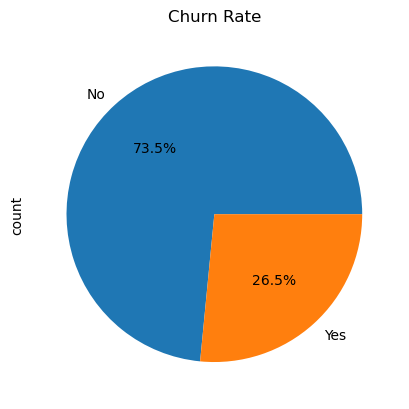

In [38]:
telco_df['Churn'].value_counts().plot.pie(title='Churn Rate',autopct='%1.1f%%')

As we can see from the pie graph above, most of the customers do not infact cancel their subscriptions

We will now conduct a data analysis into all of the independant categorical variables.Firstly we will look in to the different demgraphics vs the churn rate.We will be using these cross tab graphs as even thoough they do not give counts they display values relatively to each other thus it is easier to judge what has the bigger impact without being misled.

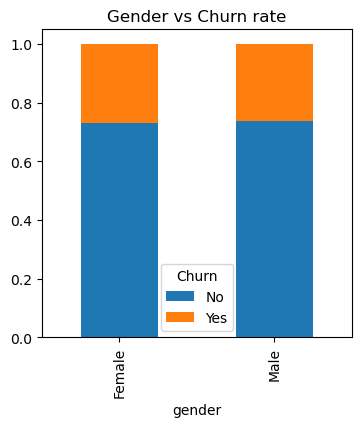

In [39]:
Gender=pd.crosstab(telco_df['gender'],telco_df['Churn'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Gender vs Churn rate')
plt.show()
SeniorCitizen=pd.crosstab(telco_df['SeniorCitizen'],telco_df['Churn'])


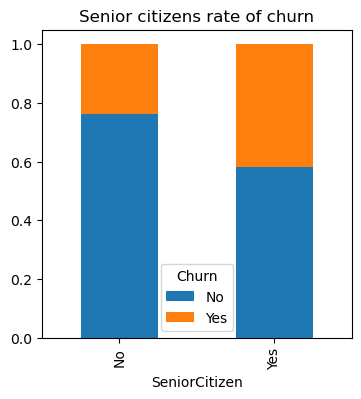

In [40]:
telco_df.loc[telco_df.SeniorCitizen==0,'SeniorCitizen'] = "No"  
telco_df.loc[telco_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
SeniorCitizen=pd.crosstab(telco_df['SeniorCitizen'],telco_df['Churn'])
SeniorCitizen.div(SeniorCitizen.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Senior citizens rate of churn')
plt.show()

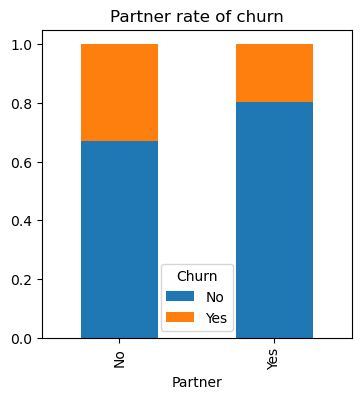

In [41]:
Partner=pd.crosstab(telco_df['Partner'],telco_df['Churn'])
Partner.div(Partner.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Partner rate of churn')
plt.show()

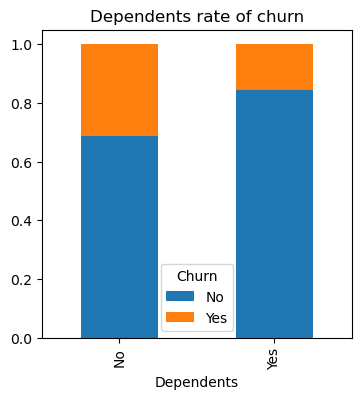

In [42]:
Dependents=pd.crosstab(telco_df['Dependents'],telco_df['Churn'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Dependents rate of churn')
plt.show()

From our analysis into the diffenrent demographics we can see that people with no dependants are more likely to churn as well as customers with no partners and senior citizens.

After we have now analysed the demographic we can analyse the different services and the churn rates thereof

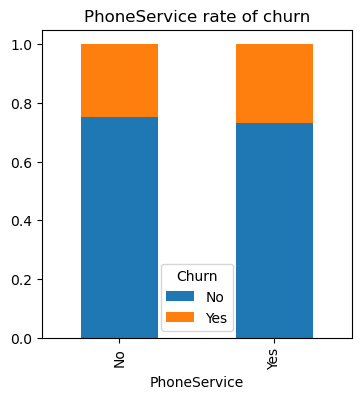

In [43]:
PhoneService=pd.crosstab(telco_df['PhoneService'],telco_df['Churn'])
PhoneService.div(PhoneService.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='PhoneService rate of churn')
plt.show()

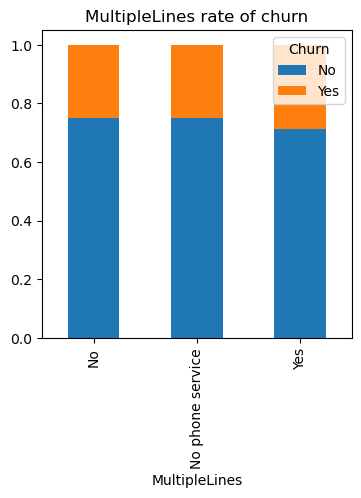

In [44]:
MultipleLines=pd.crosstab(telco_df['MultipleLines'],telco_df['Churn'])
MultipleLines.div(MultipleLines.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='MultipleLines rate of churn')
plt.show()

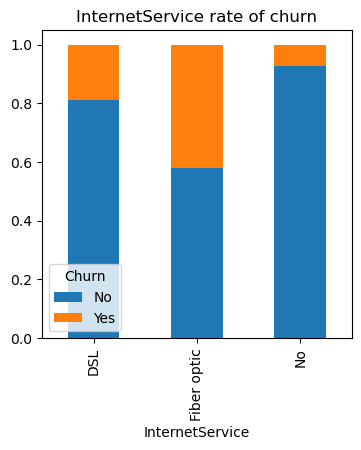

In [45]:
InternetService=pd.crosstab(telco_df['InternetService'],telco_df['Churn'])
InternetService.div(InternetService.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='InternetService rate of churn')
plt.show()

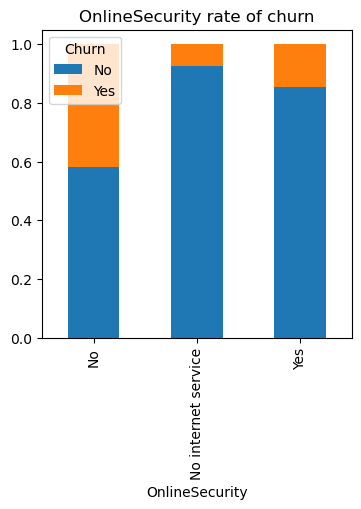

In [46]:
OnlineSecurity=pd.crosstab(telco_df['OnlineSecurity'],telco_df['Churn'])
OnlineSecurity.div(OnlineSecurity.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='OnlineSecurity rate of churn')
plt.show()

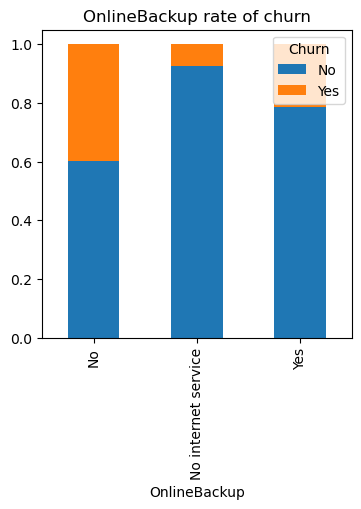

In [47]:
OnlineBackup=pd.crosstab(telco_df['OnlineBackup'],telco_df['Churn'])
OnlineBackup.div(OnlineBackup.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='OnlineBackup rate of churn')
plt.show()

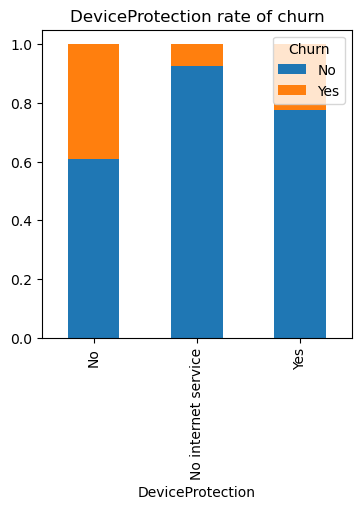

In [48]:
DeviceProtection=pd.crosstab(telco_df['DeviceProtection'],telco_df['Churn'])
DeviceProtection.div(DeviceProtection.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='DeviceProtection rate of churn')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

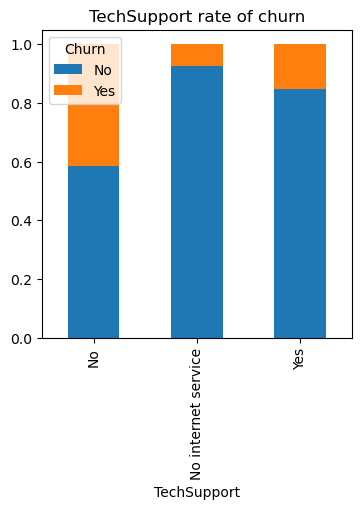

In [49]:
TechSupport=pd.crosstab(telco_df['TechSupport'],telco_df['Churn'])
TechSupport.div(TechSupport.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='TechSupport rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

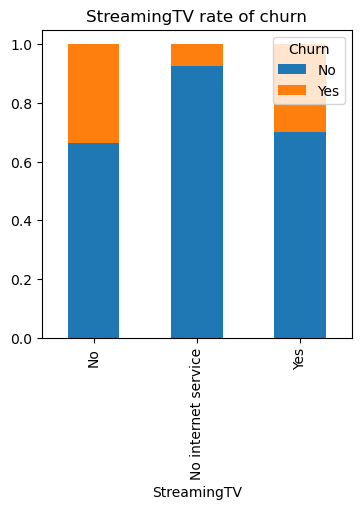

In [50]:
StreamingTV=pd.crosstab(telco_df['StreamingTV'],telco_df['Churn'])
StreamingTV.div(StreamingTV.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='StreamingTV rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

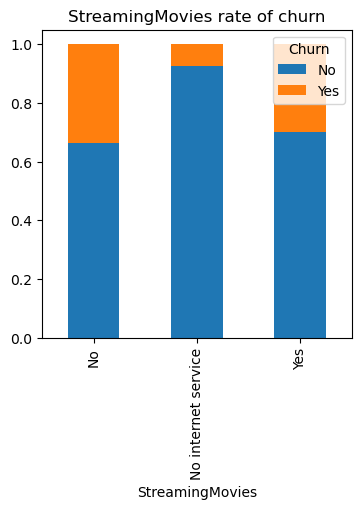

In [51]:
StreamingMovies=pd.crosstab(telco_df['StreamingMovies'],telco_df['Churn'])
StreamingMovies.div(StreamingMovies.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='StreamingMovies rate of churn')
plt.show

From the analysis of the streaming services we can now see that phone service does not have a large impact on rate of churn. People with multiple lines are a bit more likely to churn. Customers with fibre optic churns much more often than the others. Customers with  Online Security, OnlineBackup,TechSupport and DeviceProtection  are more unlikely to churn. Streaming tv and streaming movies crosstab tables are basically the same so we can see that they are nor predicitive of rate of churn.

We now need to analyze the three different payment methods and their corresponding rates of churn.

<function matplotlib.pyplot.show(close=None, block=None)>

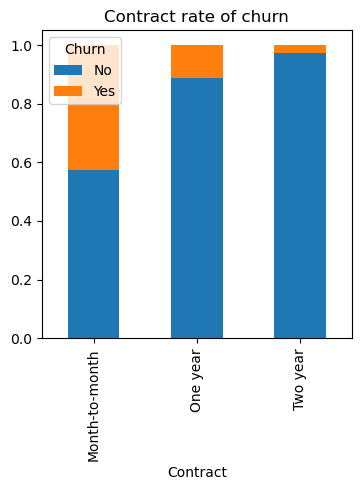

In [52]:
Contract=pd.crosstab(telco_df['Contract'],telco_df['Churn'])
Contract.div(Contract.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='Contract rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

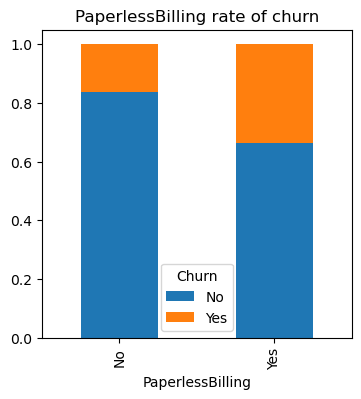

In [53]:
PaperlessBilling=pd.crosstab(telco_df['PaperlessBilling'],telco_df['Churn'])
PaperlessBilling.div(PaperlessBilling.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='PaperlessBilling rate of churn')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

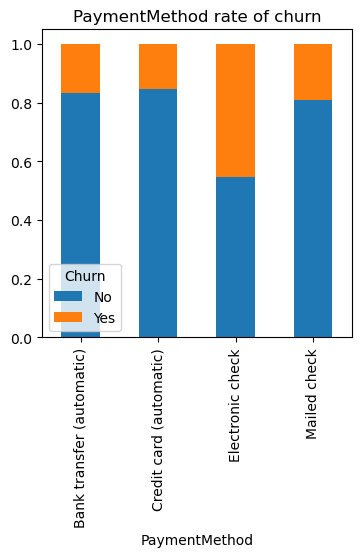

In [54]:
PaymentMethod=pd.crosstab(telco_df['PaymentMethod'],telco_df['Churn'])
PaymentMethod.div(PaymentMethod.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='PaymentMethod rate of churn')
plt.show

From this analysis we can now see that people who pay with electronic check are much more likely to churn as well as month to month clients and those who do paperless billing

The numeric features now need to be analysed.These are the total charges,monthly charges and tenure. we will firstly ensure that they are in fact classified as numerical values by looking at the data types.

In [55]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From this we can see that total charges is classified as an object where it should be numerical. We will then firstly start by fixing this error.

In [56]:
telco_df['TotalCharges']= pd.to_numeric(telco_df['TotalCharges'],errors='coerce')
telco_df['TotalCharges']= telco_df['TotalCharges'].fillna(telco_df['TotalCharges'].median())

As this has now been fixed we can create histograms with all of this dataa by creating a simple function.

In [57]:

def hist(feature):
    group_df = telco_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["blue", "orange"])
    fig.show()

In [58]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

The tenure distribution skews to the right, indicating that the majority of customers have only been with the telecom company for a short period of time, typically within the first few months (0-9 months). Notably, the highest churn rate also occurs within this initial period. Furthermore, a significant portion (75%) of customers who eventually leave the Telco company do so within their first 30 months.

Regarding monthly charges, there's a clear correlation between higher charges and a higher churn rate. This suggests that offering discounts and promotions could serve as effective incentives for customers to remain with the company.

Now we need to investigate into our numerical variables. To do this we will be creating bins for each variable.

In [59]:

bin_df = pd.DataFrame()


bin_df['tenure_bins'] =  pd.qcut(telco_df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] =  pd.qcut(telco_df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] =  pd.qcut(telco_df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = telco_df['Churn']


Now that these bins have been created we can create crosstab graphs for our numerical values 

<function matplotlib.pyplot.show(close=None, block=None)>

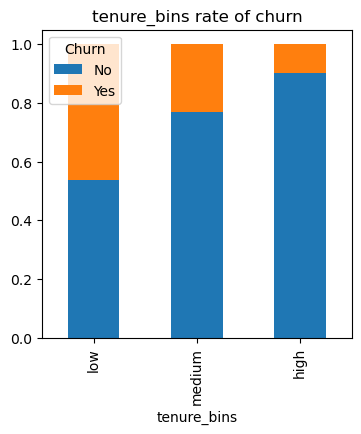

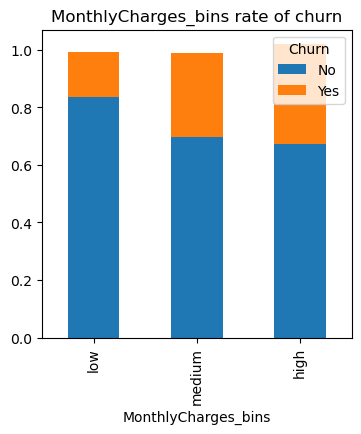

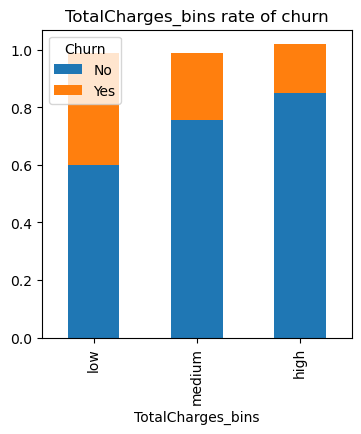

In [60]:


tenure_bins=pd.crosstab(bin_df['tenure_bins'],bin_df['Churn'])
tenure_bins.div(tenure_bins.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='tenure_bins rate of churn')
plt.show

MonthlyCharges_bins=pd.crosstab(bin_df['MonthlyCharges_bins'],bin_df['Churn'])
MonthlyCharges_bins.div(tenure_bins.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='MonthlyCharges_bins rate of churn')
plt.show

TotalCharges_bins=pd.crosstab(bin_df['TotalCharges_bins'],bin_df['Churn'])
TotalCharges_bins.div(tenure_bins.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4),title='TotalCharges_bins rate of churn')
plt.show


The analysis based on binning reveals that bins with low tenure and high monthly charges exhibit elevated churn rates, consistent with earlier findings. Additionally, the bin with low total charges also experiences a higher churn rate.

# Pre-processing the data

Fist we will drop our customer ID as it is not necessary for the training of the model.

In [61]:

telco_df.drop(["customerID"],axis=1,inplace = True)



Here we will create a map to apply to our variables that we want to convert to binarry as well as implement our dummy variables.

In [62]:

def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})


telco_df['Churn'] = telco_df[['Churn']].apply(binary_map)


telco_df['gender'] = telco_df['gender'].map({'Male':1, 'Female':0})


binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
telco_df[binary_list] = telco_df[binary_list].apply(binary_map)

telco_df = pd.get_dummies(telco_df, drop_first=True)

In [63]:

corr = telco_df.corr()
colors = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78']

fig = px.imshow(corr, width=1000, height=1000, color_continuous_scale=colors)
fig.show()

Correlation quantifies the strength of the linear relationship between two variables. When features show high correlation, they are closely related and have similar impacts on the dependent variable. Therefore, it's common practice to drop one of them to avoid redundancy. In our scenario, highly correlated features such as MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies can be dropped.

Churn prediction involves binary classification, where customers either churn or remain with the company within a specific timeframe. To guide model development, we need answers to two key questions:

Which features influence customer churn?
What are the most significant features for training a high-performance model?

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in telco_df.columns]

telco_df.columns = all_columns

glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=telco_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Mon, 13 May 2024   Deviance:                       5829.3
Time:                        21:46:50   Pearson chi2:                 8.04e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2807
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------


To address the first question, focus on the (P>|z|) column. A p-value below 0.05 indicates that the feature significantly influences churn. Examples of such features include SeniorCitizen, Tenure, Contract, PaperlessBillings, etc.

The following is to address question 2

In [65]:
np.exp(res.params)

Intercept                                        2.287343
MultipleLines_No_phone_service[T.True]           1.382358
MultipleLines_Yes[T.True]                        1.563475
InternetService_Fiber_optic[T.True]              5.771657
InternetService_No[T.True]                       0.774257
OnlineSecurity_No_internet_service[T.True]       0.774257
OnlineSecurity_Yes[T.True]                       0.814269
OnlineBackup_No_internet_service[T.True]         0.774257
OnlineBackup_Yes[T.True]                         1.026127
DeviceProtection_No_internet_service[T.True]     0.774257
DeviceProtection_Yes[T.True]                     1.159152
TechSupport_No_internet_service[T.True]          0.774257
TechSupport_Yes[T.True]                          0.836193
StreamingTV_No_internet_service[T.True]          0.774257
StreamingTV_Yes[T.True]                          1.806134
StreamingMovies_No_internet_service[T.True]      0.774257
StreamingMovies_Yes[T.True]                      1.829067
Contract_One_y


This function provides the odds ratios. Values exceeding 1 signify an elevated likelihood of churn, while values below 1 suggest a reduced likelihood of churn ocurring.

In [66]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
telco_df['tenure'] = sc.fit_transform(telco_df[['tenure']])
telco_df['MonthlyCharges'] = sc.fit_transform(telco_df[['MonthlyCharges']])
telco_df['TotalCharges'] = sc.fit_transform(telco_df[['TotalCharges']])

# Creating a baseline model

In [67]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
X = telco_df.drop('Churn', axis=1)
y = telco_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


def modeling(alg, alg_name, params={}):
    model = alg(**params) 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


# Cross validation
The following code performs feature selection using Recursive Feature Elimination with Cross-Validation (RFECV) in scikit-learn.

In [68]:

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

# Storing the data
The code below saves the code in a .sav file, which will later on be used to deploy the model.

In [69]:

import joblib
filename = 'Project2model.sav'
joblib.dump(log_model, filename)

['Project2model.sav']